# Activity 1

In [ ]:
class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state  
        self.parent = parent
        self.actions = actions  
        self.totalCost = totalCost

graph = {
    'A': Node('A', None, ['B', 'C', 'E'], None),
    'B': Node('B', None, ['A', 'D', 'E'], None),
    'C': Node('C', None, ['A', 'F', 'G'], None),
    'D': Node('D', None, ['B', 'E'], None),
    'E': Node('E', None, ['A', 'B', 'D'], None),
    'F': Node('F', None, ['C'], None),
    'G': Node('G', None, ['C'], None)
}

def BFS():
    initialState = 'D'
    goalState = 'F'
    
    frontier = [initialState]
    explored = []

    while len(frontier) != 0:
        currentNode = frontier.pop(0)
        explored.append(currentNode)

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode
                if graph[child].state == goalState:
                    return actionSequence(graph, initialState, goalState)
                frontier.append(child)

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent

    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent

    solution.reverse()
    return solution

solution = BFS()
print(solution)


['D', 'B', 'A', 'C', 'F']


# Task 1

DFS Path: ['A', 'B', 'D']


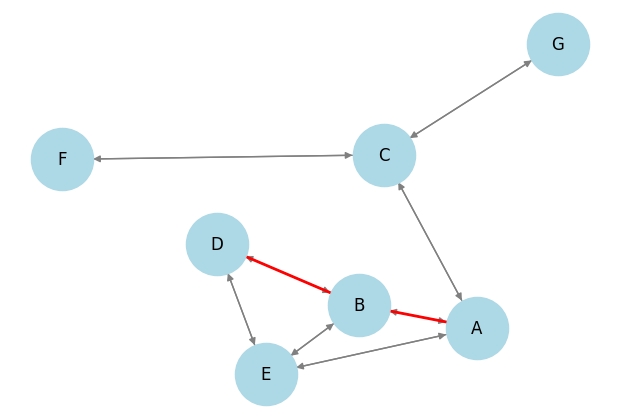

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

romania_map = nx.Graph()

edges = [
    ("Arad", "Zerind", 75), ("Arad", "Sibiu", 140), ("Arad", "Timisoara", 118),
    ("Zerind", "Oradea", 71), ("Oradea", "Sibiu", 151),
    ("Timisoara", "Lugoj", 111), ("Lugoj", "Mehadia", 70), ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120), ("Craiova", "Rimnicu Vilcea", 146), ("Craiova", "Pitesti", 138),
    ("Sibiu", "Rimnicu Vilcea", 80), ("Sibiu", "Fagaras", 99),
    ("Fagaras", "Bucharest", 211), ("Rimnicu Vilcea", "Pitesti", 97),
    ("Pitesti", "Bucharest", 101), ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85), ("Urziceni", "Vaslui", 142), ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87), ("Urziceni", "Hirsova", 98), ("Hirsova", "Eforie", 86)
]

romania_map.add_weighted_edges_from(edges)


def bfs(graph, start, goal):
    queue = deque([[start]]) 
    visited = set()  

    while queue:
        path = queue.popleft()  
        node = path[-1] 

        if node == goal:
            return path  

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:  
                new_path = list(path) + [neighbor]  
                queue.append(new_path)

shortest_path = bfs(romania_map, "Arad", "Bucharest")

print("Shortest Path from Arad to Bucharest:", " → ".join(shortest_path))
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(romania_map, seed=42)  
nx.draw(romania_map, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", font_size=10)
edge_list = list(zip(shortest_path, shortest_path[1:]))  
nx.draw_networkx_edges(romania_map, pos, edgelist=edge_list, edge_color="darkgreen", width=2.5)

plt.title("BFS Shortest Path from Arad to Bucharest")
plt.show()


# Task 2

Shortest Path: [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5)]


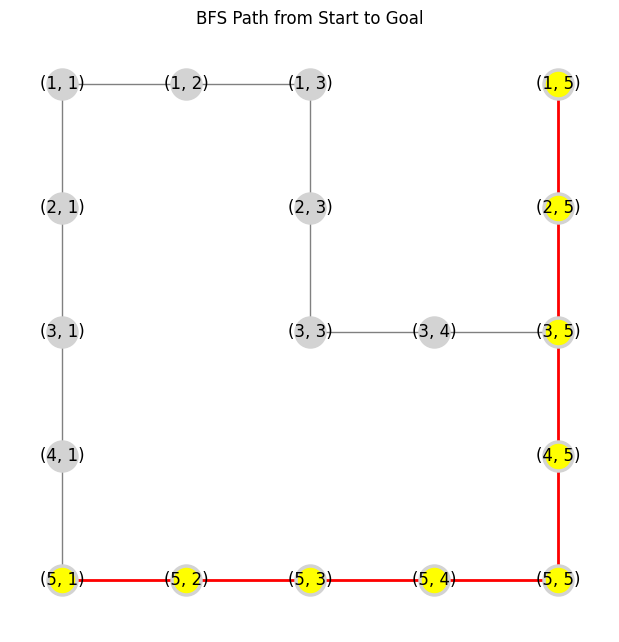

In [ ]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

maze = [
    [1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1]
]

start = (5, 1)   
goal = (1, 5)

moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]


def bfs(maze, start, goal):
    queue = deque([[start]]) 
    visited = set([start])  

    while queue:
        path = queue.popleft()  
        x, y = path[-1]  

        if (x, y) == goal:  
            return path

        for dx, dy in moves:  
            nx, ny = x + dx, y + dy

            if (0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and  
                maze[nx][ny] == 0 and  
                (nx, ny) not in visited):  
                queue.append(path + [(nx, ny)])
                visited.add((nx, ny))

shortest_path = bfs(maze, start, goal)

print("Shortest Path:", shortest_path)

maze_graph = nx.Graph()

for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 0:
            for dx, dy in moves:
                ni, nj = i + dx, j + dy
                if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0:
                    maze_graph.add_edge((i, j), (ni, nj))

plt.figure(figsize=(6, 6))
pos = {node: (node[1], -node[0]) for node in maze_graph.nodes()}
nx.draw(maze_graph, pos, with_labels=True, node_size=500, node_color="lightgray", edge_color="gray")

if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(maze_graph, pos, nodelist=shortest_path, node_color="yellow")
    nx.draw_networkx_edges(maze_graph, pos, edgelist=path_edges, edge_color="red", width=2)

plt.title("BFS Path from Start to Goal")
plt.show()
